# Tuning Neural Networks with Regularization - Lab

## Introduction

Recall from the last lab that you had a training accuracy close to 90% and a test set accuracy close to 76%.

As with your previous machine learning work, you should be asking a couple of questions:
- Is there a high bias? yes/no
- Is there a high variance? yes/no 

In this lab, you'll use the a train-validate-test partition to get better insights of how to tune neural networks using regularization techniques. You'll start by repeating the process from the last section: importing the data and performing preprocessing including one-hot encoding. Then, just before you go on to train the model, you'll see how to include a validation set. From there, you'll define and compile the model like before. However, this time, when you are presented with the `history` dictionary of the model, you will have additional data entries for not only the train and test set but also the validation set.

## Objectives

You will be able to:

* Construct and run a basic model in Keras
* Construct a validation set and explain potential benefits
* Apply L1 and L2 regularization
* Apply dropout regularization
* Observe and comment on the effect of using more data

## Import the libraries

As usual, start by importing some of the packages and modules that you intend to use. The first thing you'll be doing is importing the data and taking a random sample, so that should clue you in to what tools to import. If you need more tools down the line, you can always import additional packages later.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


## Load the Data

As with the previous lab, the data is stored in a file **Bank_complaints.csv**. Load and preview the dataset.

In [2]:
df = pd.read_csv('Bank_complaints.csv')
df.head()

,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...


## Preprocessing Overview

Before you begin to practice some of your new tools regarding regularization and optimization, let's practice munging some data as you did in the previous section with bank complaints. Recall some techniques:

* Sampling in order to reduce training time (investigate model accuracy vs data size later on)
* One-hot encoding your complaint text
* Transforming your category labels
* Train - test split

## Preprocessing: Generate a Random Sample

Since you have quite a bit of data and training networks takes a substantial amount of time and resources, downsample in order to test your initial pipeline. Going forward, these can be interesting areas of investigation: how does your models performance change as you increase (or decrease) the size of your dataset?  

Generate the random sample using seed 123 for consistency of results. Make your new sample have 10,000 observations.

In [3]:
random.seed(123)
df = df.sample(10000)
df.index = range(10000)
product = df["Product"]
complaints = df["Consumer complaint narrative"]

## Preprocessing: One-hot Encoding of the Complaints

As before, you need to do some preprocessing and data manipulationg before building the neural network. 

Keep the 2,000 most common words and use one-hot encoding to reformat the complaints into a matrix of vectors.

In [4]:
#Yyour code here; use one-hot encoding to reformat the complaints into a matrix of vectors.
#Only keep the 2000 most common words.
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(complaints)

one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results)


(10000, 2000)

## Preprocessing: Encoding the Products

Similarly, now transform the descriptive product labels to integers labels. After transforming them to integer labels, retransform them into a matrix of binary flags, one for each of the various product labels.  
  
> **Note**: This is similar to your previous work with dummy variables. Each of the various product categories will be its own column, and each observation will be a row. In turn, each of these observation rows will have a 1 in the column associated with it's label, and all other entries for the row will be zero.

In [5]:
#Your code here; transform the product labels to numerical values
le = preprocessing.LabelEncoder()
le.fit(product)
product_cat = le.transform(product) 

#Then transform these integer values into a matrix of binary flags
product_onehot = to_categorical(product_cat)

## Train-test Split

Now onto the ever familiar train-test split! 
Below, perform an appropriate train test split.
> Be sure to split both the complaint data (now transformed into word vectors) as well as their associated labels. 

In [6]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(one_hot_results,
                                                    product_onehot,
                                                    test_size=1500,
                                                    random_state=42)


## Running the model using a validation set.

## Creating the Validation Set

In the lecture, you saw that in deep learning, you generally set aside a validation set, which is then used during hyperparameter tuning. Afterwards, when you have decided upon a final model, the test can then be used to define the final model perforance. 

In this example, take the first 1000 cases out of the training set to create a validation set. You should do this for both `train` and `label_train`.

In [7]:
#Just run this block of code 
random.seed(123)
val = X_train[:1000]
train_final = X_train[1000:]
label_val = y_train[:1000]
label_train_final = y_train[1000:]

## Creating the Model

Rebuild a fully connected (Dense) layer network with relu activations in Keras.

Recall that you used 2 hidden with 50 units in the first layer and 25 in the second, both with a `relu` activation function. Because you are dealing with a multiclass problem (classifying the complaints into 7 classes), use a softmax classifyer in order to output 7 class probabilities per case. 

In [8]:
#Your code here; build a neural network using Keras as described above.
random.seed(123)
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))


## Compiling the Model
In the compiler, you'll be passing the optimizer, loss function, and metrics. Train the model for 120 epochs in mini-batches of 256 samples. This time, include the argument `validation_data` and assign it `(val, label_val)`

In [9]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

Ok, now for the resource intensive part: time to train your model! Note that this is where you also introduce the validation data to the model.

In [10]:
#Code provided; note the extra validation parameter passed.
model_val = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/120
7500/7500 [==============================] - 0s 58us/step - loss: 1.9485 - acc: 0.1519 - val_loss: 1.9464 - val_acc: 0.1450
Epoch 2/120
7500/7500 [==============================] - 0s 27us/step - loss: 1.9332 - acc: 0.1732 - val_loss: 1.9317 - val_acc: 0.1680
Epoch 3/120
7500/7500 [==============================] - 0s 26us/step - loss: 1.9195 - acc: 0.1939 - val_loss: 1.9186 - val_acc: 0.1910
Epoch 4/120
7500/7500 [==============================] - 0s 28us/step - loss: 1.9046 - acc: 0.2084 - val_loss: 1.9050 - val_acc: 0.2060
Epoch 5/120
7500/7500 [==============================] - 0s 28us/step - loss: 1.8877 - acc: 0.2196 - val_loss: 1.8891 - val_acc: 0.2160
Epoch 6/120
7500/7500 [==============================] - 0s 27us/step - loss: 1.8680 - acc: 0.2265 - val_loss: 1.8700 - val_acc: 0.2270
Epoch 7/120
7500/7500 [==============================] - 0s 27us/step - loss: 1.8455 - acc: 0.2364 - val_loss: 1.8479 - val_acc: 0.2380


7500/7500 [==============================] - 0s 28us/step - loss: 0.5892 - acc: 0.7956 - val_loss: 0.7330 - val_acc: 0.7440
Epoch 61/120
7500/7500 [==============================] - 0s 28us/step - loss: 0.5826 - acc: 0.7969 - val_loss: 0.7296 - val_acc: 0.7480
Epoch 62/120
7500/7500 [==============================] - 0s 27us/step - loss: 0.5767 - acc: 0.7985 - val_loss: 0.7272 - val_acc: 0.7500
Epoch 63/120
7500/7500 [==============================] - 0s 30us/step - loss: 0.5702 - acc: 0.8005 - val_loss: 0.7225 - val_acc: 0.7510
Epoch 64/120
7500/7500 [==============================] - 0s 27us/step - loss: 0.5644 - acc: 0.8025 - val_loss: 0.7274 - val_acc: 0.7420
Epoch 65/120
7500/7500 [==============================] - 0s 27us/step - loss: 0.5591 - acc: 0.8044 - val_loss: 0.7211 - val_acc: 0.7480
Epoch 66/120
7500/7500 [==============================] - 0s 30us/step - loss: 0.5537 - acc: 0.8059 - val_loss: 0.7143 - val_acc: 0.7530
Epoch 67/120
7500/7500 [==============================

Epoch 120/120
7500/7500 [==============================] - 0s 33us/step - loss: 0.3653 - acc: 0.8767 - val_loss: 0.6845 - val_acc: 0.7770


## Retrieving Performance Results: the `history` dictionary

The dictionary `history` contains four entries this time: one per metric that was being monitored during training and during validation.

In [11]:
model_val_dict = model_val.history
model_val_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
results_train = model.evaluate(train_final, label_train_final)

7500/7500 [==============================] - 0s 43us/step


In [13]:
results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 100us/step


In [14]:
results_train

[0.36228916635513303, 0.8797333333333334]

In [15]:
results_test

[0.6310145746866862, 0.7626666666666667]

Note that the result isn't exactly the same as before. Note that this because the training set is slightly different! you remove 1000 instances for validation!

## Plotting the Results

Plot the loss function versus the number of epochs. Be sure to include the training and the validation loss in the same plot. Then, create a second plot comparing training and validation accuracy to the number of epochs.

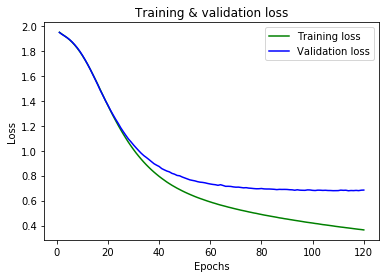

In [16]:
plt.clf()

import matplotlib.pyplot as plt
loss_values = model_val_dict['loss']
val_loss_values = model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'blue', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

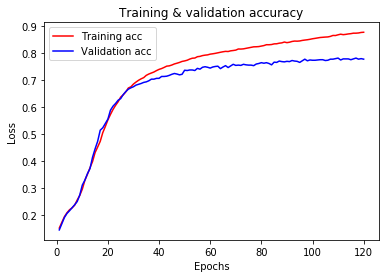

In [17]:
plt.clf()

acc_values = model_val_dict['acc'] 
val_acc_values = model_val_dict['val_acc']

plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'blue', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Notice an interesting pattern here: although the training accuracy keeps increasing when going through more epochs, and the training loss keeps decreasing, the validation accuracy and loss seem to be reaching a limit around the 60th epoch. This means that you're probably **overfitting** the model to the training data when you train for many epochs past this dropoff point of around 40 epochs. Luckily, you learned how to tackle overfitting in the previous lecture! Since it seems clear that you are training too long, include early stopping at the 60th epoch first.

## Early Stopping

Below, observe how to update the model to include an earlier cutoff point:

In [18]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

final_model = model.fit(train_final,
                    label_train_final,
                    epochs=60,
                    batch_size=256,
                    validation_data=(val, label_val),
                    verbose=2)

Train on 7500 samples, validate on 1000 samples
Epoch 1/60
 - 0s - loss: 1.9393 - acc: 0.1612 - val_loss: 1.9314 - val_acc: 0.1800
Epoch 2/60
 - 0s - loss: 1.9207 - acc: 0.1851 - val_loss: 1.9154 - val_acc: 0.1910
Epoch 3/60
 - 0s - loss: 1.9042 - acc: 0.2045 - val_loss: 1.9001 - val_acc: 0.2070
Epoch 4/60
 - 0s - loss: 1.8875 - acc: 0.2221 - val_loss: 1.8837 - val_acc: 0.2120
Epoch 5/60
 - 0s - loss: 1.8695 - acc: 0.2356 - val_loss: 1.8652 - val_acc: 0.2240
Epoch 6/60
 - 0s - loss: 1.8488 - acc: 0.2509 - val_loss: 1.8428 - val_acc: 0.2530
Epoch 7/60
 - 0s - loss: 1.8246 - acc: 0.2763 - val_loss: 1.8168 - val_acc: 0.2860
Epoch 8/60
 - 0s - loss: 1.7953 - acc: 0.3061 - val_loss: 1.7845 - val_acc: 0.3230
Epoch 9/60
 - 0s - loss: 1.7609 - acc: 0.3429 - val_loss: 1.7496 - val_acc: 0.3470
Epoch 10/60
 - 0s - loss: 1.7232 - acc: 0.3707 - val_loss: 1.7125 - val_acc: 0.3550
Epoch 11/60
 - 0s - loss: 1.6829 - acc: 0.3948 - val_loss: 1.6712 - val_acc: 0.3940
Epoch 12/60
 - 0s - loss: 1.6402 - ac

Now, you can use the test set to make label predictions

In [19]:
results_train = model.evaluate(train_final, label_train_final)

7500/7500 [==============================] - 0s 44us/step


In [20]:
results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 114us/step


In [21]:
results_train

[0.5490461005528768, 0.8046666666348775]

In [22]:
results_test

[0.6741684044202169, 0.7599999996821085]

We've significantly reduced the variance, so this is already pretty good! your test set accuracy is slightly worse, but this model will definitely be more robust than the 120 epochs model you originally fit.

Now, take a look at how regularization techniques can further improve your model performance.

## L2 Regularization

First, take a look at L2 regularization. Keras makes L2 regularization easy. Simply add the `kernel_regularizer=kernel_regulizers.l2(lamda_coeff)` parameter to any model layer. The lambda_coeff parameter determines the strength of the regularization you wish to perform.

In [23]:
from keras import regularizers
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L2_model = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val),
                    verbose=0)

In [24]:
L2_model_dict = L2_model.history
L2_model_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Now, look at the training accuracy as well as the validation accuracy for both the L2 and the model without regularization (for 120 epochs).

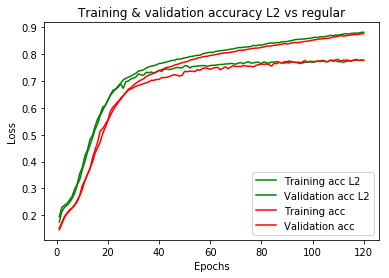

In [25]:
plt.clf()

acc_values = L2_model_dict['acc'] 
val_acc_values = L2_model_dict['val_acc']
model_acc = model_val_dict['acc']
model_val_acc = model_val_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc L2')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc L2')
plt.plot(epochs, model_acc, 'r', label='Training acc')
plt.plot(epochs, model_val_acc, 'r', label='Validation acc')
plt.title('Training & validation accuracy L2 vs regular')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The results of L2 regularization are quite disappointing here. Notice the discrepancy between validation and training accuracy seems to have decreased slightly, but the end result is definitely not getting better. 

## L1 Regularization

Have a look at L1 regularization. Will this work better?

In [27]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/120
7500/7500 [==============================] - 1s 75us/step - loss: 15.9936 - acc: 0.1489 - val_loss: 15.5824 - val_acc: 0.1610
Epoch 2/120
7500/7500 [==============================] - 0s 31us/step - loss: 15.2386 - acc: 0.1733 - val_loss: 14.8409 - val_acc: 0.1780
Epoch 3/120
7500/7500 [==============================] - 0s 32us/step - loss: 14.5059 - acc: 0.2019 - val_loss: 14.1196 - val_acc: 0.2130
Epoch 4/120
7500/7500 [==============================] - 0s 29us/step - loss: 13.7933 - acc: 0.2251 - val_loss: 13.4180 - val_acc: 0.2370
Epoch 5/120
7500/7500 [==============================] - 0s 30us/step - loss: 13.1001 - acc: 0.2452 - val_loss: 12.7353 - val_acc: 0.2530
Epoch 6/120
7500/7500 [==============================] - 0s 36us/step - loss: 12.4254 - acc: 0.2629 - val_loss: 12.0701 - val_acc: 0.2710
Epoch 7/120
7500/7500 [==============================] - 0s 43us/step - loss: 11.7688 - acc: 0.2964 - val_loss: 11.4244 - va

7500/7500 [==============================] - 0s 30us/step - loss: 1.6900 - acc: 0.6892 - val_loss: 1.6823 - val_acc: 0.6880
Epoch 61/120
7500/7500 [==============================] - 0s 30us/step - loss: 1.6800 - acc: 0.6907 - val_loss: 1.6706 - val_acc: 0.6950
Epoch 62/120
7500/7500 [==============================] - 0s 30us/step - loss: 1.6704 - acc: 0.6913 - val_loss: 1.6610 - val_acc: 0.7080
Epoch 63/120
7500/7500 [==============================] - 0s 29us/step - loss: 1.6609 - acc: 0.6913 - val_loss: 1.6513 - val_acc: 0.7110
Epoch 64/120
7500/7500 [==============================] - 0s 28us/step - loss: 1.6514 - acc: 0.6935 - val_loss: 1.6462 - val_acc: 0.7090
Epoch 65/120
7500/7500 [==============================] - 0s 29us/step - loss: 1.6428 - acc: 0.6941 - val_loss: 1.6342 - val_acc: 0.7060
Epoch 66/120
7500/7500 [==============================] - 0s 33us/step - loss: 1.6334 - acc: 0.6949 - val_loss: 1.6227 - val_acc: 0.7080
Epoch 67/120
7500/7500 [==============================

Epoch 120/120
7500/7500 [==============================] - 0s 28us/step - loss: 1.2848 - acc: 0.7280 - val_loss: 1.2990 - val_acc: 0.7320


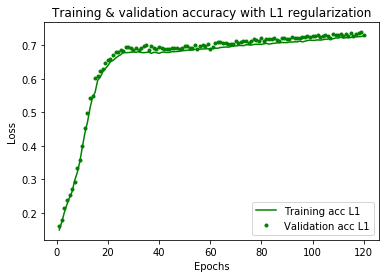

In [28]:
L1_model_dict = L1_model.history
plt.clf()

acc_values = L1_model_dict['acc'] 
val_acc_values = L1_model_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc L1')
plt.plot(epochs, val_acc_values, 'g.', label='Validation acc L1')
plt.title('Training & validation accuracy with L1 regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Notice how the training and validation accuracy don't diverge as much as before. Unfortunately, the validation accuracy doesn't reach rates much higher than 70%. It does seem like you can still improve the model by training much longer.

In [ ]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(train_final,
                    label_train_final,
                    epochs=1000,
                    batch_size=256,
                    validation_data=(val, label_val),
                    verbose=2)

Train on 7500 samples, validate on 1000 samples
Epoch 1/1000
 - 0s - loss: 15.9798 - acc: 0.1887 - val_loss: 15.5766 - val_acc: 0.2170
Epoch 2/1000
 - 0s - loss: 15.2187 - acc: 0.2167 - val_loss: 14.8275 - val_acc: 0.2340
Epoch 3/1000
 - 0s - loss: 14.4810 - acc: 0.2401 - val_loss: 14.1006 - val_acc: 0.2500
Epoch 4/1000
 - 0s - loss: 13.7641 - acc: 0.2533 - val_loss: 13.3930 - val_acc: 0.2560
Epoch 5/1000
 - 0s - loss: 13.0667 - acc: 0.2745 - val_loss: 12.7059 - val_acc: 0.2780
Epoch 6/1000
 - 0s - loss: 12.3883 - acc: 0.2997 - val_loss: 12.0346 - val_acc: 0.3100
Epoch 7/1000
 - 0s - loss: 11.7276 - acc: 0.3295 - val_loss: 11.3833 - val_acc: 0.3650
Epoch 8/1000
 - 0s - loss: 11.0860 - acc: 0.3715 - val_loss: 10.7524 - val_acc: 0.3960
Epoch 9/1000
 - 0s - loss: 10.4649 - acc: 0.4077 - val_loss: 10.1418 - val_acc: 0.4130
Epoch 10/1000
 - 0s - loss: 9.8649 - acc: 0.4397 - val_loss: 9.5529 - val_acc: 0.4500


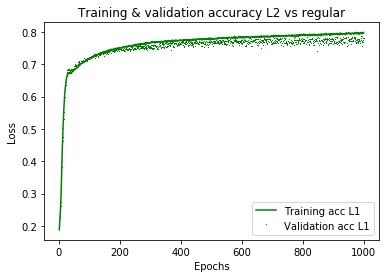

In [33]:
L1_model_dict = L1_model.history
plt.clf()

acc_values = L1_model_dict['acc'] 
val_acc_values = L1_model_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'g', label='Training acc L1')
plt.plot(epochs, val_acc_values, 'g,', label='Validation acc L1')
plt.title('Training & validation accuracy L2 vs regular')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
results_train = model.evaluate(train_final, label_train_final)

results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 26us/step


In [36]:
results_train

[0.8237653533299764, 0.7967999999682108]

In [37]:
results_test

[0.966706668694814, 0.7499999998410543]

This is about the best result you've achieved so far, but you were training for quite a while! Next, experiment with dropout regularization to see if it offers any advantages.

## Dropout Regularization

In [38]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dropout(0.3, input_shape=(2000,)))
model.add(layers.Dense(50, activation='relu')) #2 hidden layers
model.add(layers.Dropout(0.3))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

dropout_model = model.fit(train_final,
                    label_train_final,
                    epochs=200,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/200
7500/7500 [==============================] - 1s 71us/step - loss: 2.0228 - acc: 0.1372 - val_loss: 1.9610 - val_acc: 0.1380
Epoch 2/200
7500/7500 [==============================] - 0s 26us/step - loss: 1.9760 - acc: 0.1439 - val_loss: 1.9430 - val_acc: 0.1630
Epoch 3/200
7500/7500 [==============================] - 0s 27us/step - loss: 1.9560 - acc: 0.1548 - val_loss: 1.9328 - val_acc: 0.1790
Epoch 4/200
7500/7500 [==============================] - 0s 27us/step - loss: 1.9462 - acc: 0.1639 - val_loss: 1.9249 - val_acc: 0.1890
Epoch 5/200
7500/7500 [==============================] - 0s 27us/step - loss: 1.9412 - acc: 0.1661 - val_loss: 1.9189 - val_acc: 0.2040
Epoch 6/200
7500/7500 [==============================] - 0s 27us/step - loss: 1.9261 - acc: 0.1800 - val_loss: 1.9124 - val_acc: 0.2090
Epoch 7/200
7500/7500 [==============================] - 0s 26us/step - loss: 1.9231 - acc: 0.1896 - val_loss: 1.9062 - val_acc: 0.2310


Epoch 120/200
7500/7500 [==============================] - 0s 28us/step - loss: 0.9110 - acc: 0.6584 - val_loss: 0.6407 - val_acc: 0.7640
Epoch 121/200
7500/7500 [==============================] - 0s 27us/step - loss: 0.8934 - acc: 0.6695 - val_loss: 0.6380 - val_acc: 0.7670
Epoch 122/200
7500/7500 [==============================] - 0s 29us/step - loss: 0.8921 - acc: 0.6660 - val_loss: 0.6374 - val_acc: 0.7640
Epoch 123/200
7500/7500 [==============================] - 0s 27us/step - loss: 0.8894 - acc: 0.6664 - val_loss: 0.6322 - val_acc: 0.7660
Epoch 124/200
7500/7500 [==============================] - 0s 26us/step - loss: 0.8856 - acc: 0.6701 - val_loss: 0.6285 - val_acc: 0.7670
Epoch 125/200
7500/7500 [==============================] - 0s 28us/step - loss: 0.8889 - acc: 0.6688 - val_loss: 0.6283 - val_acc: 0.7700
Epoch 126/200
7500/7500 [==============================] - 0s 27us/step - loss: 0.8769 - acc: 0.6671 - val_loss: 0.6276 - val_acc: 0.7680
Epoch 127/200
7500/7500 [=========

In [39]:
results_train = model.evaluate(train_final, label_train_final)
results_test = model.evaluate(X_test, y_test)

1500/1500 [==============================] - 0s 26us/step


In [40]:
results_train

[0.44953240927060445, 0.8355999999682109]

In [41]:
results_test

[0.6567809325853984, 0.745333333492279]

You can see here that the validation performance has improved again! the variance did become higher again compared to L1-regularization.

## Bigger Data?

In the lecture, one of the solutions to high variance was just getting more data. You actually *have* more data, but took a subset of 10,000 units before. Let's now quadruple your data set, and see what happens. Note that you are really just lucky here, and getting more data isn't always possible, but this is a useful exercise in order to understand the power of big data sets.

In [42]:
df = pd.read_csv('Bank_complaints.csv')
random.seed(123)
df = df.sample(40000)
df.index = range(40000)
product = df["Product"]
complaints = df["Consumer complaint narrative"]

#one-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(complaints)
sequences = tokenizer.texts_to_sequences(complaints)
one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary')
word_index = tokenizer.word_index
np.shape(one_hot_results)

#one-hot encoding of products
le = preprocessing.LabelEncoder()
le.fit(product)
list(le.classes_)
product_cat = le.transform(product) 
product_onehot = to_categorical(product_cat)

# train test split
test_index = random.sample(range(1,40000), 4000)
test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)
label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

#Validation set
random.seed(123)
val = train[:3000]
train_final = train[3000:]
label_val = label_train[:3000]
label_train_final = label_train[3000:]

In [43]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

moredata_model = model.fit(train_final,
                    label_train_final,
                    epochs=120,
                    batch_size=256,
                    validation_data=(val, label_val))

Train on 33000 samples, validate on 3000 samples
Epoch 1/120
33000/33000 [==============================] - 1s 25us/step - loss: 1.9131 - acc: 0.1977 - val_loss: 1.8734 - val_acc: 0.2517
Epoch 2/120
33000/33000 [==============================] - 1s 16us/step - loss: 1.8204 - acc: 0.3034 - val_loss: 1.7551 - val_acc: 0.3397
Epoch 3/120
33000/33000 [==============================] - 1s 16us/step - loss: 1.6686 - acc: 0.4072 - val_loss: 1.5741 - val_acc: 0.4647
Epoch 4/120
33000/33000 [==============================] - 1s 15us/step - loss: 1.4662 - acc: 0.5248 - val_loss: 1.3619 - val_acc: 0.5560
Epoch 5/120
33000/33000 [==============================] - 1s 15us/step - loss: 1.2557 - acc: 0.6060 - val_loss: 1.1666 - val_acc: 0.6303
Epoch 6/120
33000/33000 [==============================] - 0s 15us/step - loss: 1.0768 - acc: 0.6660 - val_loss: 1.0120 - val_acc: 0.6777
Epoch 7/120
33000/33000 [==============================] - 1s 15us/step - loss: 0.9451 - acc: 0.7012 - val_loss: 0.9037 - v

Epoch 118/120
33000/33000 [==============================] - 0s 15us/step - loss: 0.3024 - acc: 0.8965 - val_loss: 0.5461 - val_acc: 0.8117
Epoch 119/120
33000/33000 [==============================] - 1s 16us/step - loss: 0.3013 - acc: 0.8966 - val_loss: 0.5459 - val_acc: 0.8127
Epoch 120/120
33000/33000 [==============================] - 0s 15us/step - loss: 0.2998 - acc: 0.8972 - val_loss: 0.5460 - val_acc: 0.8150


In [44]:
results_train = model.evaluate(train_final, label_train_final)
results_test = model.evaluate(test, label_test)

4000/4000 [==============================] - 0s 22us/step


In [45]:
results_train

[0.29492314792401864, 0.8997272727272727]

In [46]:
results_test

[0.5750258494615554, 0.805]

With the same amount of epochs, you were able to get a fairly similar validation accuracy of 89.67 (compared to 88.55 in obtained in the first model in this lab). your test set accuracy went up from 75.8 to a staggering 80.225% though, without any other regularization technique. You can still consider early stopping, L1, L2 and dropout here. It's clear that having more data has a strong impact on model performance!

## Additional Resources

* https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb
* https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
* https://catalog.data.gov/dataset/consumer-complaint-database

## Summary  

In this lesson, you not only built an initial deep-learning model, you then used a validation set to tune your model using various types of regularization.